Importing libraries


In [1]:

from sklearn.svm import SVC
from sklearn.metrics import  confusion_matrix, accuracy_score ,  classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-728e7598f4a7>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


reading data

In [ ]:
data =pd.read_csv('MOT.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-30,85.900002,86.400002,85.300003,85.699997,85.118523,10846744
1,2023-07-03,86.300003,86.400002,85.300003,86.099998,85.515816,6238291
2,2023-07-04,86.500000,86.500000,84.800003,85.150002,84.572258,7104307
3,2023-07-05,91.000000,93.650002,88.650002,90.300003,89.687317,60717634
4,2023-07-06,90.849998,92.900002,90.000000,91.550003,90.928841,21908735
...,...,...,...,...,...,...,...
239,2024-06-24,187.080002,190.100006,182.720001,188.279999,188.279999,23911136
240,2024-06-25,188.550003,194.580002,188.360001,192.889999,192.889999,35550296
241,2024-06-26,192.199997,196.509995,190.729996,193.750000,193.750000,33502842
242,2024-06-27,193.750000,200.199997,192.580002,198.550003,198.550003,54928227


In [ ]:
dfna = data.dropna()
df = dfna.round(1)


Data Preperation

In [ ]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis=1)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-30,85.9,86.4,85.3,85.7,85.1,10846744
2023-07-03,86.3,86.4,85.3,86.1,85.5,6238291
2023-07-04,86.5,86.5,84.8,85.2,84.6,7104307
2023-07-05,91.0,93.7,88.7,90.3,89.7,60717634
2023-07-06,90.8,92.9,90.0,91.6,90.9,21908735
...,...,...,...,...,...,...
2024-06-24,187.1,190.1,182.7,188.3,188.3,23911136
2024-06-25,188.6,194.6,188.4,192.9,192.9,35550296
2024-06-26,192.2,196.5,190.7,193.8,193.8,33502842


Explanatory variables

In [ ]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low


# Store all predictor variables in a variable X
XN = df[['Open-Close', 'High-Low']]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(XN.iloc[:, 1:3])
XN.iloc[:, 1:3] = imputer.transform(XN.iloc[:, 1:3])



X= XN.round(2)
X


,Open-Close,High-Low
Date,,
2023-06-30,0.2,1.1
2023-07-03,0.2,1.1
2023-07-04,1.3,1.7
2023-07-05,0.7,5.0
2023-07-06,-0.8,2.9
...,...,...
2024-06-24,-1.2,7.4
2024-06-25,-4.3,6.2
2024-06-26,-1.6,5.8


Target variable

In [ ]:
# Target variables determining where there is an opportunity to buy
# 1 means buy
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y


array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


strategy implementation

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)


In [ ]:
df['Predicted_Signal'] = cls.predict(X)
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal
Date,,,,,,,,,
2023-06-30,85.9,86.4,85.3,85.7,85.1,10846744,0.2,1.1,1
2023-07-03,86.3,86.4,85.3,86.1,85.5,6238291,0.2,1.1,1
2023-07-04,86.5,86.5,84.8,85.2,84.6,7104307,1.3,1.7,1
2023-07-05,91.0,93.7,88.7,90.3,89.7,60717634,0.7,5.0,1
2023-07-06,90.8,92.9,90.0,91.6,90.9,21908735,-0.8,2.9,1
...,...,...,...,...,...,...,...,...,...
2024-06-24,187.1,190.1,182.7,188.3,188.3,23911136,-1.2,7.4,1
2024-06-25,188.6,194.6,188.4,192.9,192.9,35550296,-4.3,6.2,1
2024-06-26,192.2,196.5,190.7,193.8,193.8,33502842,-1.6,5.8,1


calculate daily returns

In [ ]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()*100
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return
Date,,,,,,,,,,
2023-06-30,85.9,86.4,85.3,85.7,85.1,10846744,0.2,1.1,1,NaN
2023-07-03,86.3,86.4,85.3,86.1,85.5,6238291,0.2,1.1,1,0.466744
2023-07-04,86.5,86.5,84.8,85.2,84.6,7104307,1.3,1.7,1,-1.045296
2023-07-05,91.0,93.7,88.7,90.3,89.7,60717634,0.7,5.0,1,5.985915
2023-07-06,90.8,92.9,90.0,91.6,90.9,21908735,-0.8,2.9,1,1.439646
...,...,...,...,...,...,...,...,...,...,...
2024-06-24,187.1,190.1,182.7,188.3,188.3,23911136,-1.2,7.4,1,0.319659
2024-06-25,188.6,194.6,188.4,192.9,192.9,35550296,-4.3,6.2,1,2.442910
2024-06-26,192.2,196.5,190.7,193.8,193.8,33502842,-1.6,5.8,1,0.466563



calculate strategy returns
---



In [ ]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return
Date,,,,,,,,,,,
2023-06-30,85.9,86.4,85.3,85.7,85.1,10846744,0.2,1.1,1,NaN,NaN
2023-07-03,86.3,86.4,85.3,86.1,85.5,6238291,0.2,1.1,1,0.466744,0.466744
2023-07-04,86.5,86.5,84.8,85.2,84.6,7104307,1.3,1.7,1,-1.045296,-1.045296
2023-07-05,91.0,93.7,88.7,90.3,89.7,60717634,0.7,5.0,1,5.985915,5.985915
2023-07-06,90.8,92.9,90.0,91.6,90.9,21908735,-0.8,2.9,1,1.439646,1.439646
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,187.1,190.1,182.7,188.3,188.3,23911136,-1.2,7.4,1,0.319659,0.319659
2024-06-25,188.6,194.6,188.4,192.9,192.9,35550296,-4.3,6.2,1,2.442910,2.442910
2024-06-26,192.2,196.5,190.7,193.8,193.8,33502842,-1.6,5.8,1,0.466563,0.466563


culumulative return

In [ ]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2023-06-30,85.9,86.4,85.3,85.7,85.1,10846744,0.2,1.1,1,NaN,NaN,NaN
2023-07-03,86.3,86.4,85.3,86.1,85.5,6238291,0.2,1.1,1,0.466744,0.466744,0.466744
2023-07-04,86.5,86.5,84.8,85.2,84.6,7104307,1.3,1.7,1,-1.045296,-1.045296,-0.578552
2023-07-05,91.0,93.7,88.7,90.3,89.7,60717634,0.7,5.0,1,5.985915,5.985915,5.407364
2023-07-06,90.8,92.9,90.0,91.6,90.9,21908735,-0.8,2.9,1,1.439646,1.439646,6.847009
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,187.1,190.1,182.7,188.3,188.3,23911136,-1.2,7.4,1,0.319659,0.319659,82.933054
2024-06-25,188.6,194.6,188.4,192.9,192.9,35550296,-4.3,6.2,1,2.442910,2.442910,85.375964
2024-06-26,192.2,196.5,190.7,193.8,193.8,33502842,-1.6,5.8,1,0.466563,0.466563,85.842527


cumulative strategy return

In [ ]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2023-06-30,85.9,86.4,85.3,85.7,85.1,10846744,0.2,1.1,1,NaN,NaN,NaN,NaN
2023-07-03,86.3,86.4,85.3,86.1,85.5,6238291,0.2,1.1,1,0.466744,0.466744,0.466744,0.466744
2023-07-04,86.5,86.5,84.8,85.2,84.6,7104307,1.3,1.7,1,-1.045296,-1.045296,-0.578552,-0.578552
2023-07-05,91.0,93.7,88.7,90.3,89.7,60717634,0.7,5.0,1,5.985915,5.985915,5.407364,5.407364
2023-07-06,90.8,92.9,90.0,91.6,90.9,21908735,-0.8,2.9,1,1.439646,1.439646,6.847009,6.847009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,187.1,190.1,182.7,188.3,188.3,23911136,-1.2,7.4,1,0.319659,0.319659,82.933054,87.819266
2024-06-25,188.6,194.6,188.4,192.9,192.9,35550296,-4.3,6.2,1,2.442910,2.442910,85.375964,90.262176
2024-06-26,192.2,196.5,190.7,193.8,193.8,33502842,-1.6,5.8,1,0.466563,0.466563,85.842527,90.728739


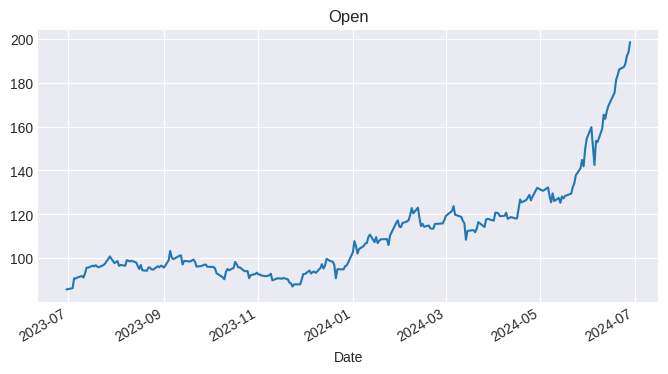

In [ ]:
# @title Open

from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

plotting and testing

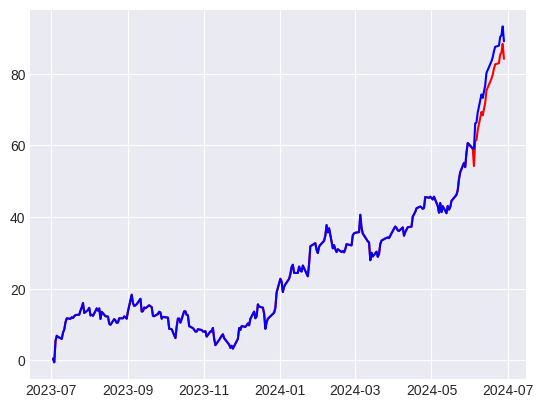

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')


accuracy check

In [ ]:
y_pred = cls.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]]


In [ ]:
y_train_pred = cls.predict(X_train)
y_test_pred = cls.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy
test_accuracy


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cm
accuracy_score(y_test, y_test_pred)






0.5306122448979592